# An analysis to predict the size of a tumor which transcends to depicting breast cancer 

In [13]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle as pkl
%matplotlib inline

In [14]:
dataset = pd.read_csv(r"C:\Users\ARINZE\Desktop\tumor.csv")
#importing the dataset

# Exploratory Data Analysis

In [15]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
dataset.shape

(683, 11)

In [17]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [18]:
dataset2 = dataset.drop(columns =['Sample code number'])

In [19]:
dataset2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [20]:
dataset2.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [21]:
dataset2.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


# Data Visulisations

In [22]:
dataset3 = dataset2.corr()

<AxesSubplot:>

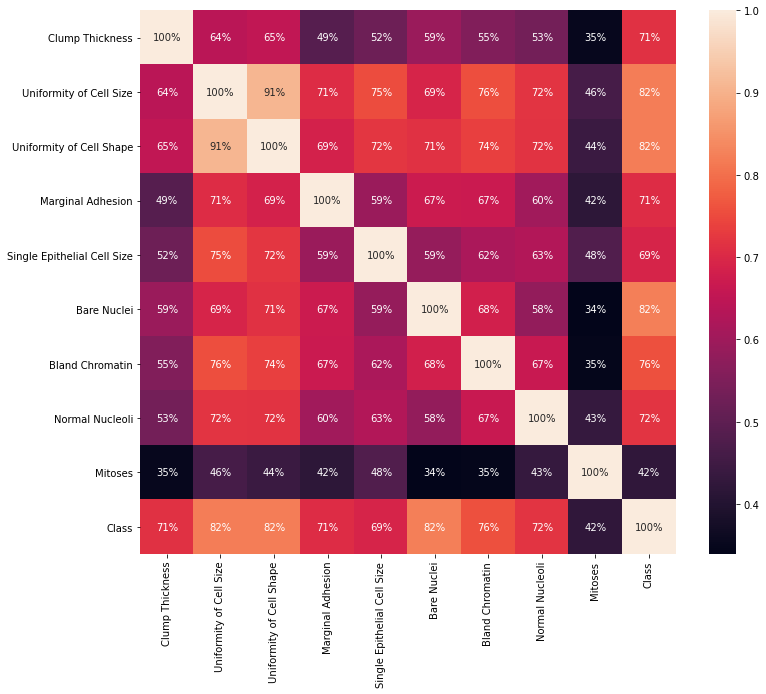

In [23]:
plt.figure(figsize = (12,10))
seabornInstance.heatmap((dataset3), annot=True, fmt='.0%')

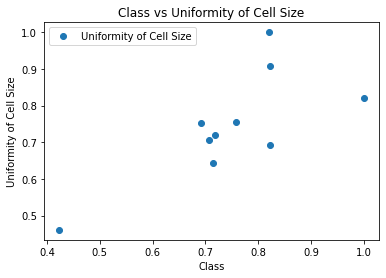

In [24]:
dataset3.plot(x='Class', y='Uniformity of Cell Size', style='o')  
plt.title('Class vs Uniformity of Cell Size')  
plt.xlabel('Class')  
plt.ylabel('Uniformity of Cell Size')  
plt.show()

<Figure size 1440x2160 with 0 Axes>

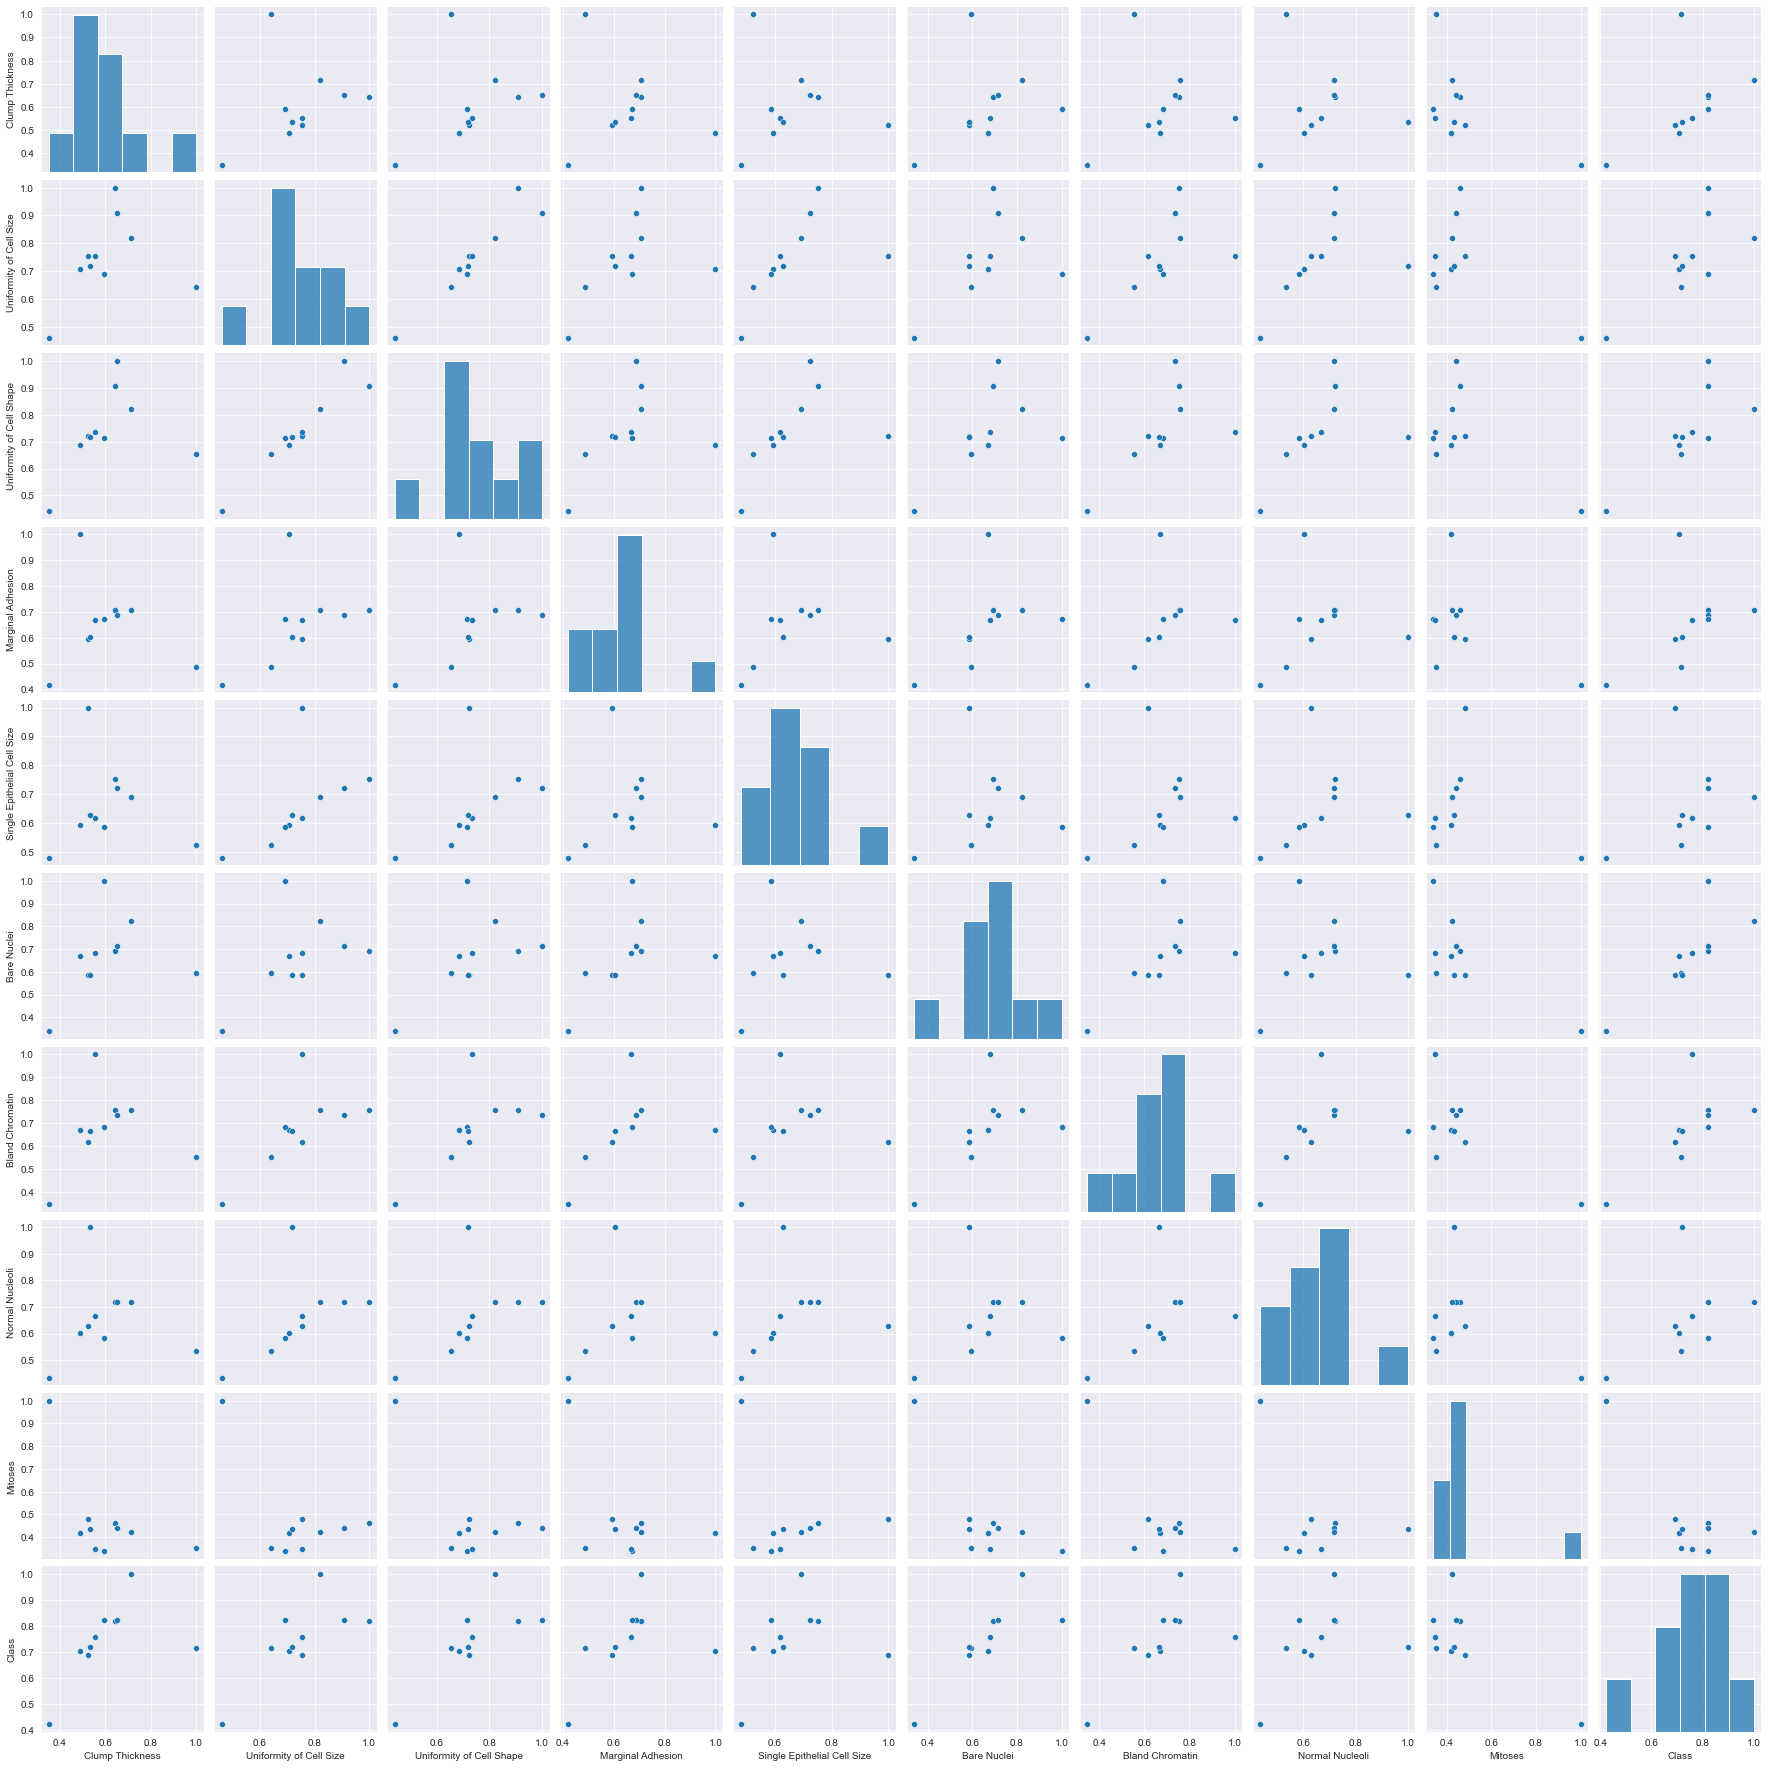

In [50]:
plt.figure(figsize=(20,30))
plt.tight_layout()
seabornInstance.pairplot(dataset3);

<Figure size 1440x2160 with 0 Axes>

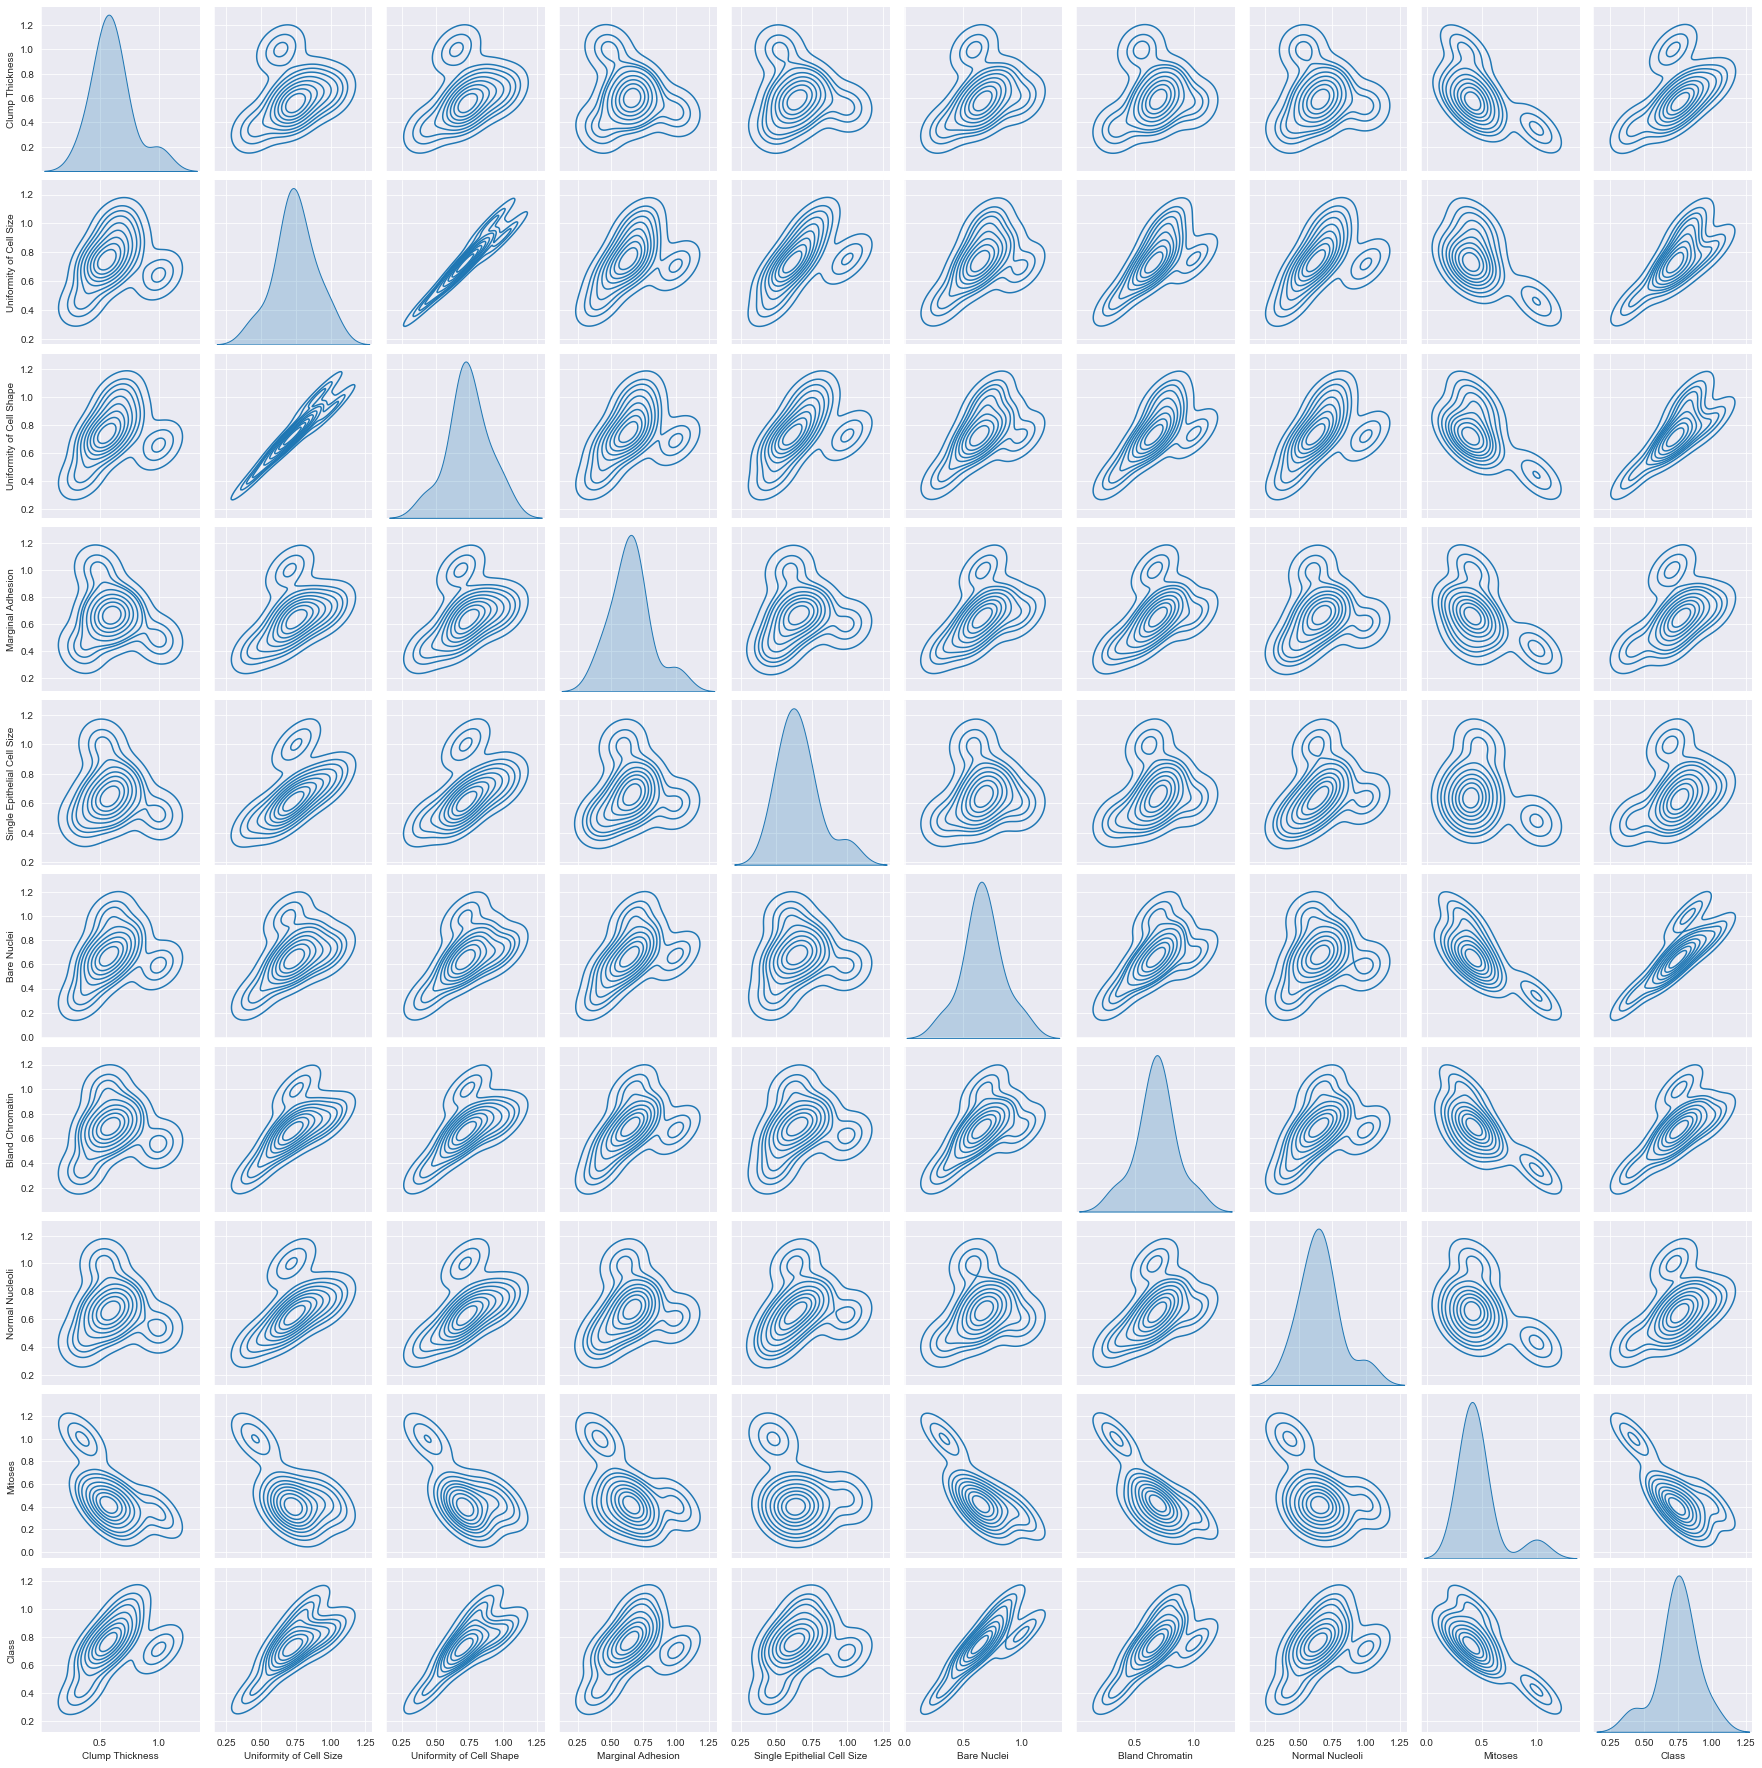

In [51]:
plt.figure(figsize=(20,30))
plt.tight_layout()
seabornInstance.pairplot(dataset3, kind ='kde');

<Figure size 1440x2160 with 0 Axes>

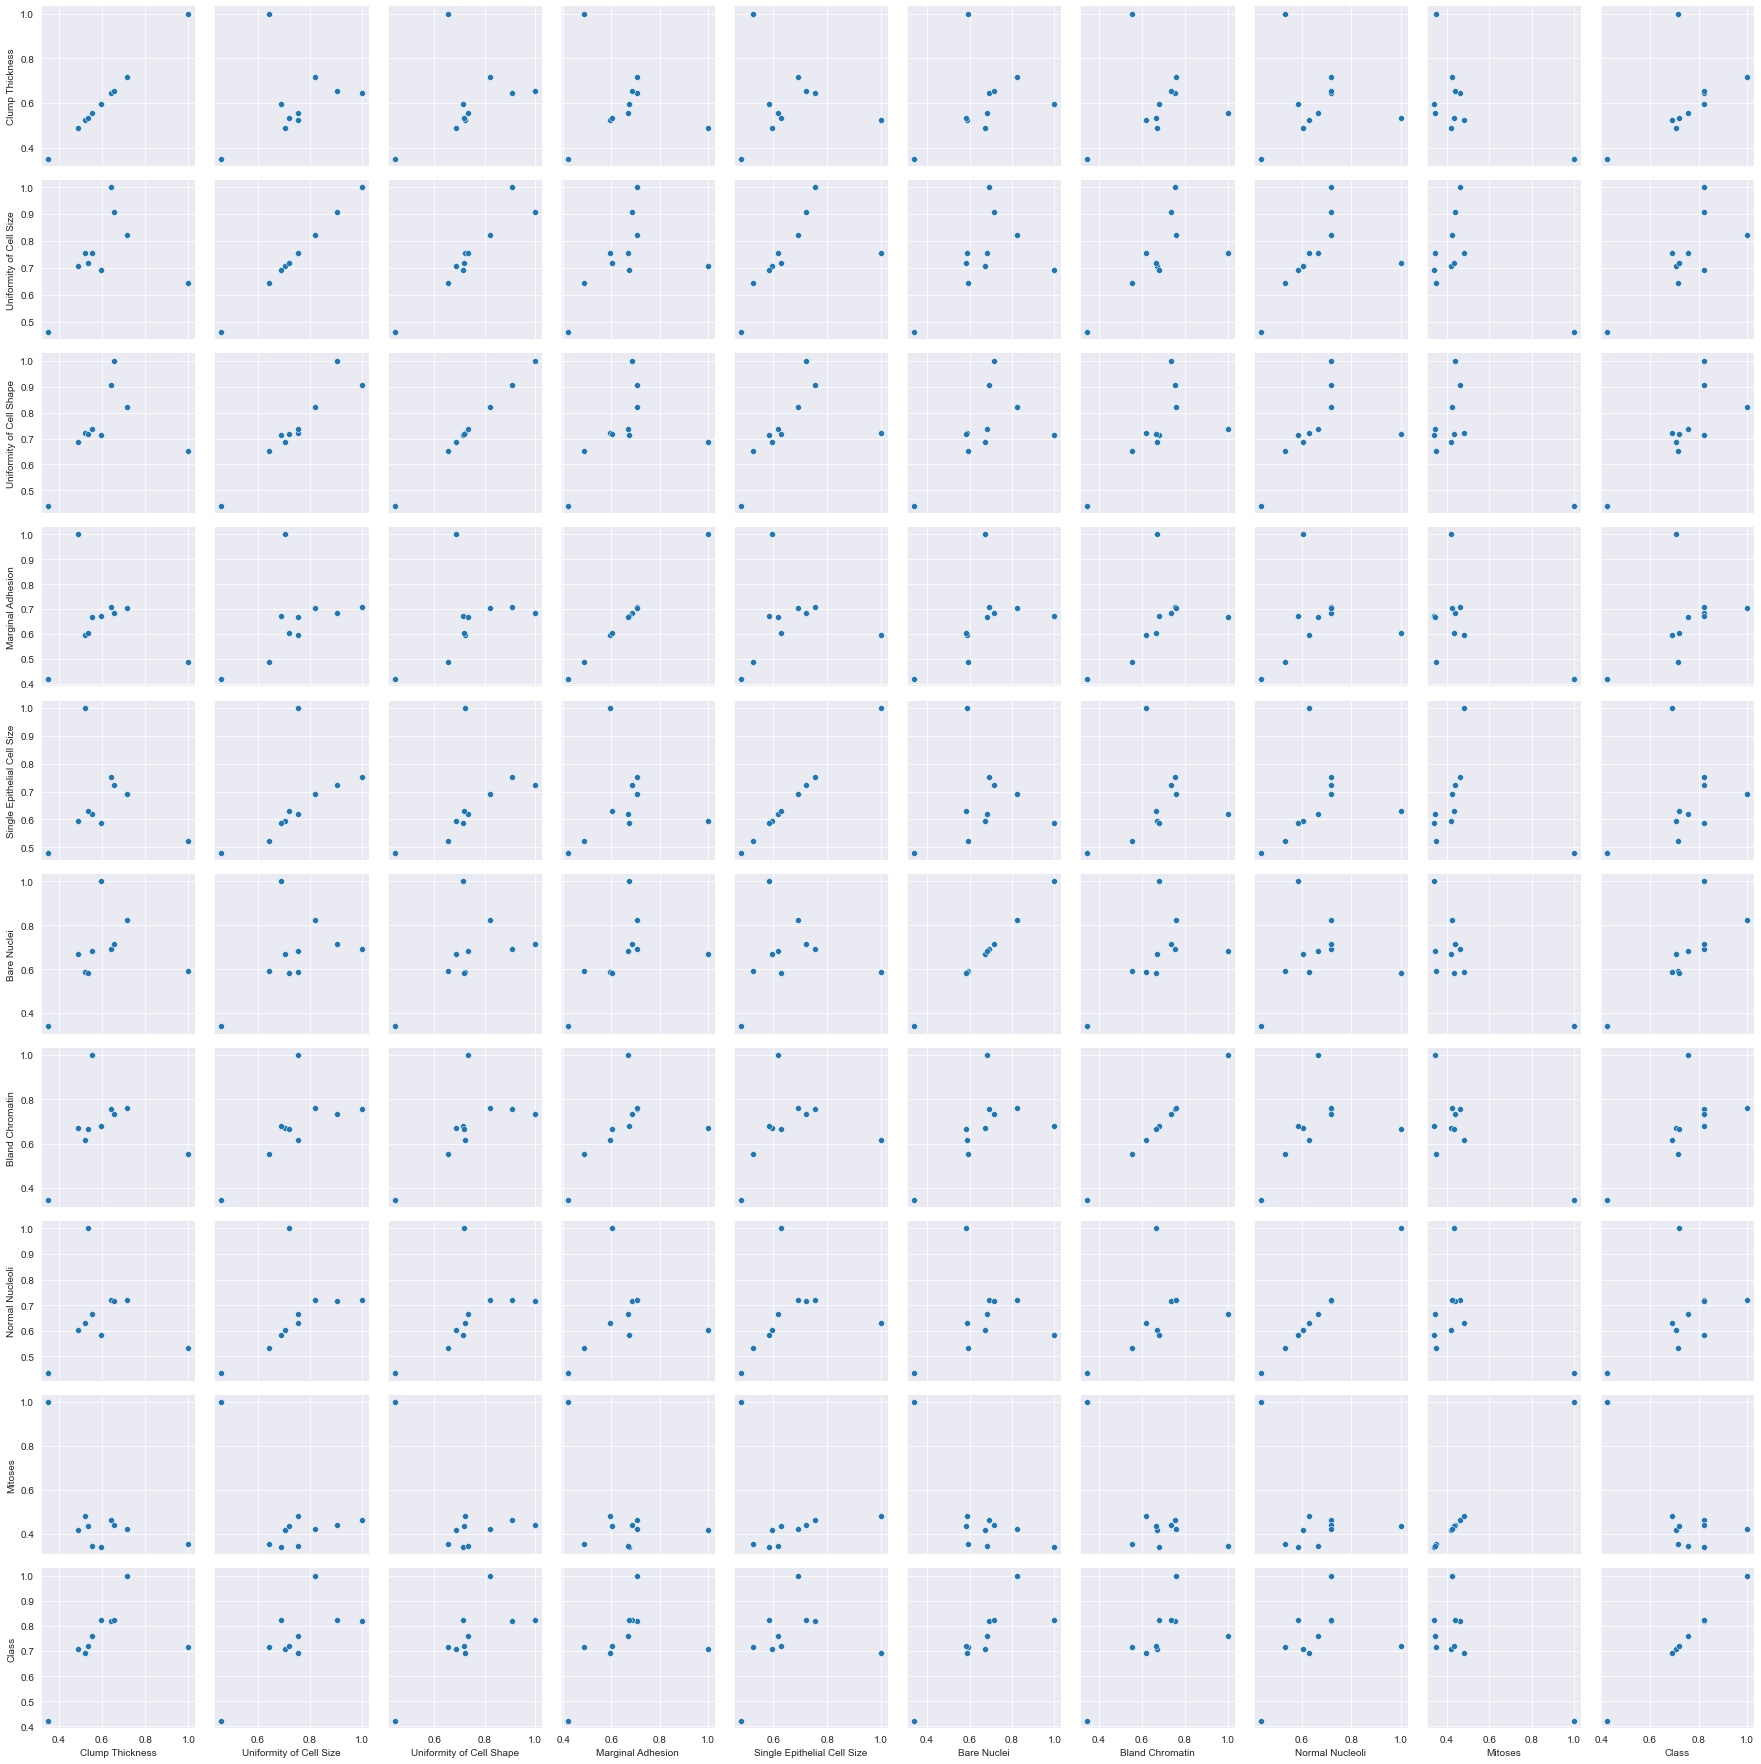

In [52]:
plt.figure(figsize=(20,30))
plt.tight_layout()
g = seabornInstance.PairGrid(dataset3);
g.map(seabornInstance.scatterplot);

<Figure size 1440x2160 with 0 Axes>

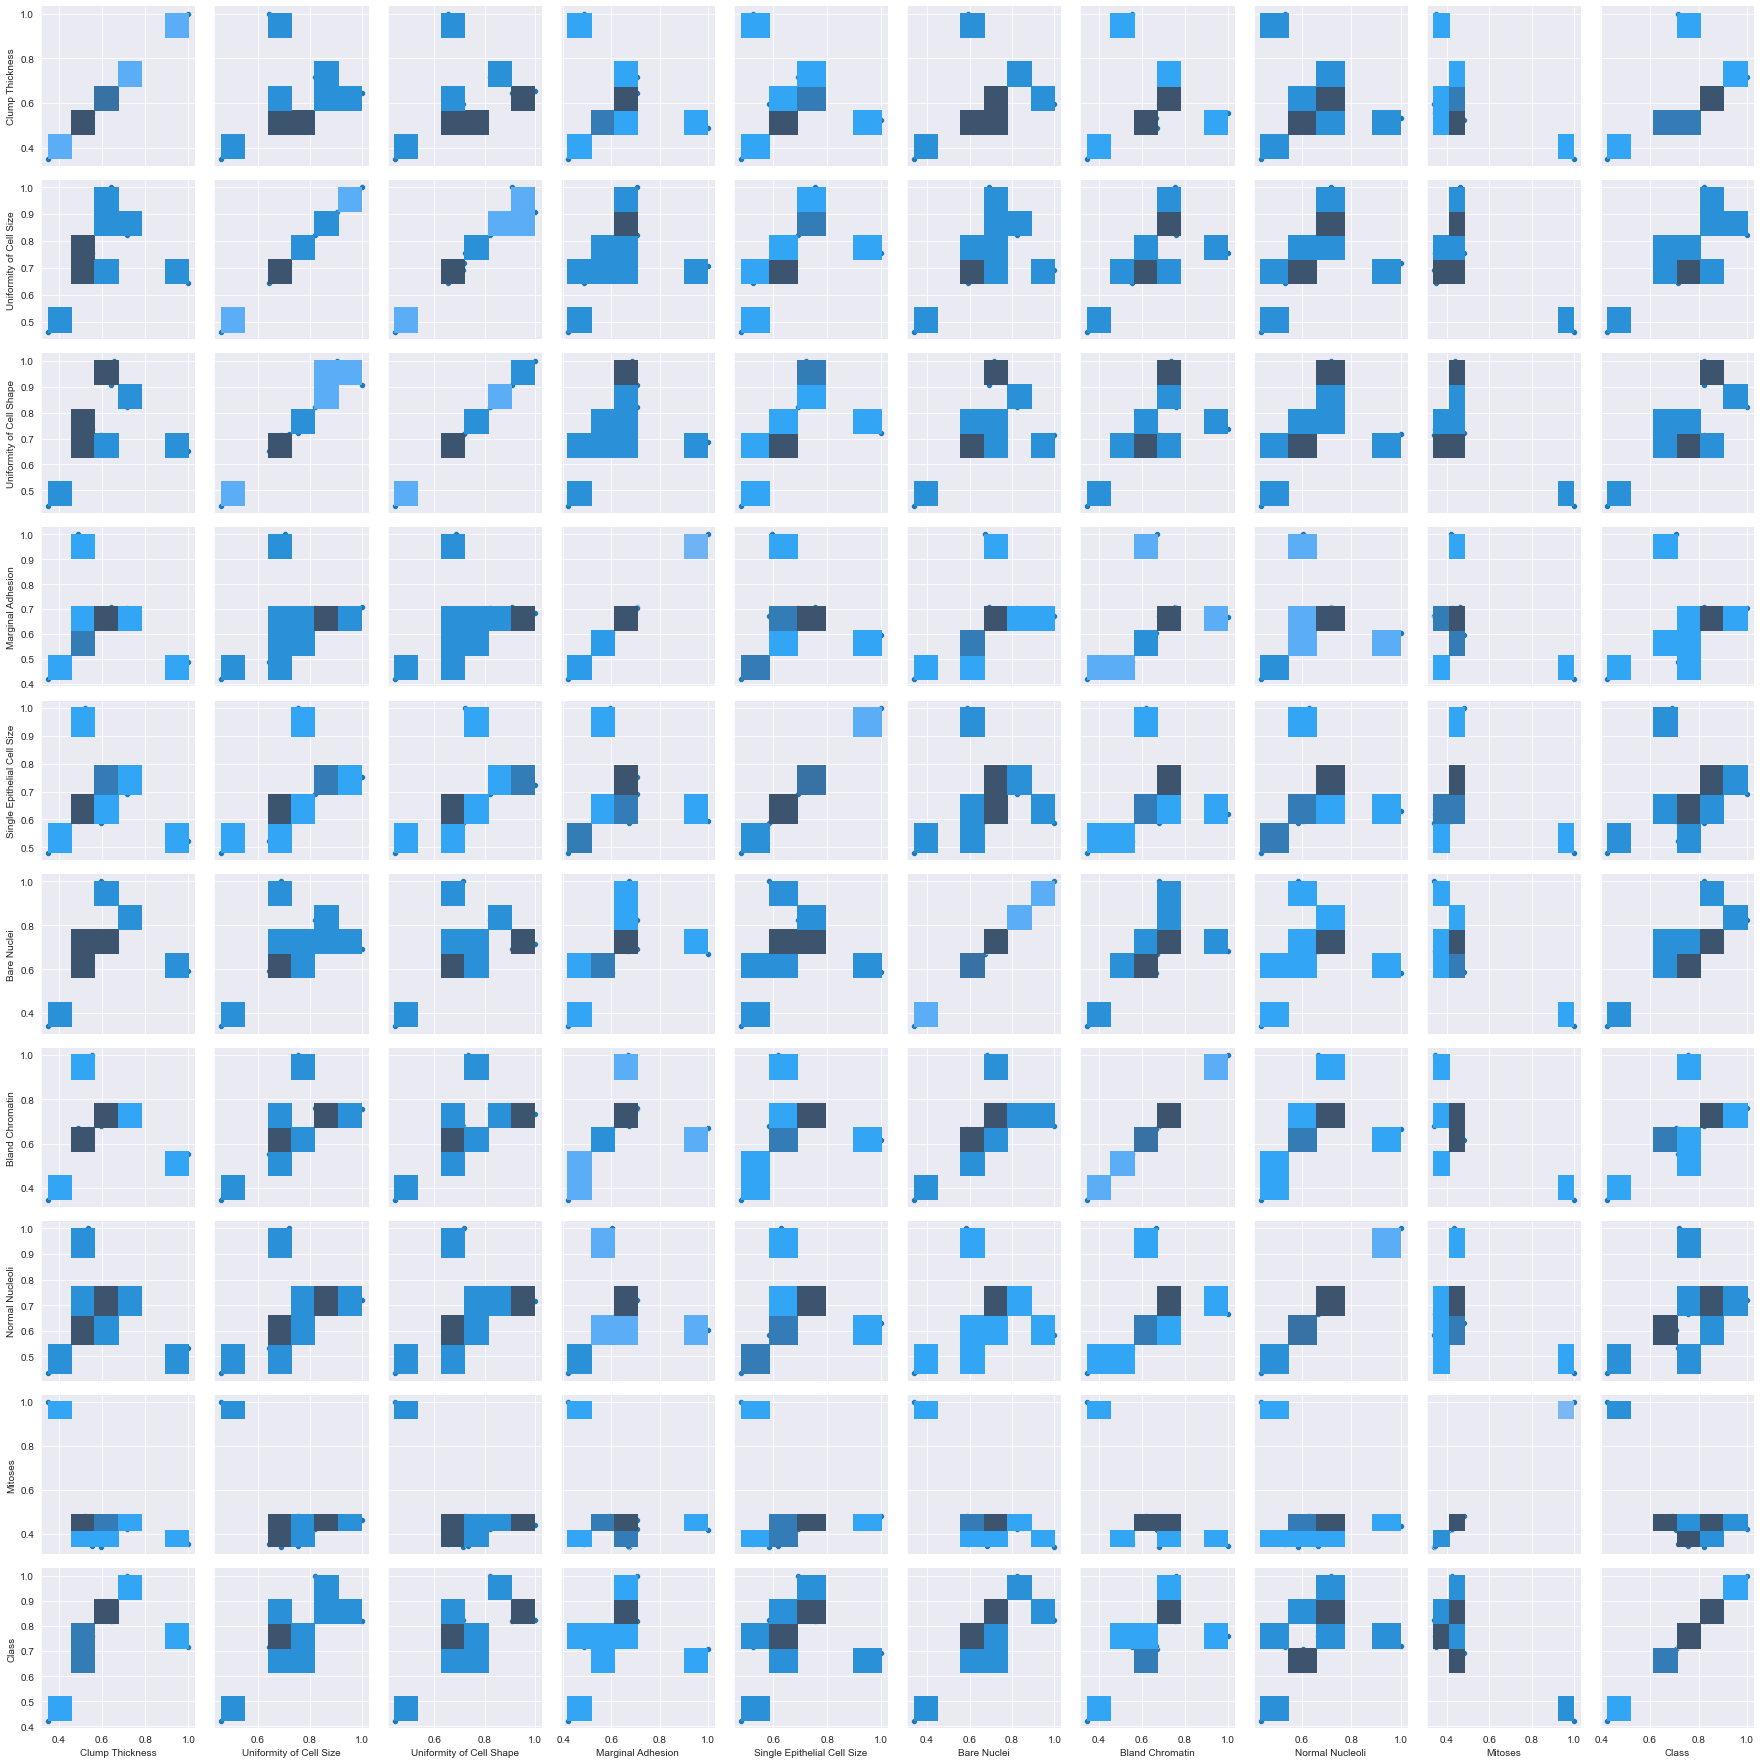

In [53]:
plt.figure(figsize=(20,30))
plt.tight_layout()
g.map(seabornInstance.histplot);

In [32]:
X = dataset2.drop(columns = ['Class'] )
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [33]:
y = dataset2['Class']
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Building the Machine Learning Model using Decision Tree

In [54]:
model_1 = DecisionTreeClassifier()
model_1.fit(X, y)
predictions = model_1.predict ([[5,6,7,4,7,8,9,8,3], [3,3,4,5,5,6,6,6,8]])

In [55]:
predictions #where 4 means malignant and 2 means benign

array([4, 2], dtype=int64)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.9562043795620438

In [61]:
import pickle

In [68]:
pickle.dump(model_2, open('model_3.pickle','wb'))

In [69]:
model = pickle.load(open('model_3.pickle', 'rb'))
print (model.predict ([[3,3,4,5,5,6,6,6,8]]) )

[4]


# In Summary, If the model predicts a rumor size of 2 it means that the tumor is benign which means that the person(sample) does not have breast cancer but if the model predicts a tumor size of 4 it means that the tumor is malignant which means that the person(sample) could possibly have breast cancer.